In [6]:
import tensorflow as tf
import numpy as np
from cv2 import cv2 as cv
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.1


In [7]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

model.save("handwriting.h5")

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2922 - accuracy: 0.9156
Epoch 2/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1433 - accuracy: 0.9582
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1080 - accuracy: 0.9671
Epoch 4/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0877 - accuracy: 0.9724
Epoch 5/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0770 - accuracy: 0.9757
10000/1 - 0s - loss: 0.0369 - accuracy: 0.9777


In [8]:
def show(aim):
    [rows, cols] = aim.shape
    for row in range(rows):
        for col in range(cols):
            print(f"{aim[row, col]:3d}", end="")
        print()
            
            
def output(aim):
    [rows, cols] = aim.shape
    with open('out.txt', 'w') as file:
        for row in range(rows):
            for col in range(cols):
                file.write(f"{aim[row, col]:3d}", )
            file.write("\n")
            
saved_model = tf.keras.models.load_model("handwriting.h5")

#### 模型预测值

Label of it: 5
Predict value: 5


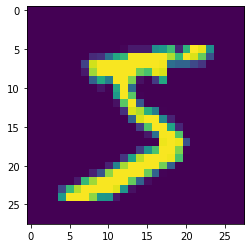

In [9]:
# 测试数据与标签值对比

res = saved_model.predict(np.array([x_train[0]]))
res = res[0].tolist()
print(f"Label of it: {y_train[0]}")
print(f"Predict value: {res.index(max(res))}")
plt.imshow(x_train[0])

[1.1616747147558115e-10, 5.8507266658125445e-06, 0.9998624324798584, 5.116785905556753e-05, 1.949645955789947e-08, 8.453721989098995e-08, 8.039316162467003e-05, 9.936118061659727e-08, 1.647304237462066e-10, 2.2047179179692216e-15]
Predict value: 2


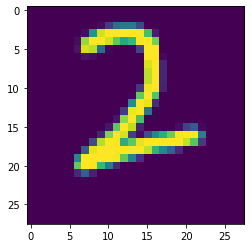

In [10]:
# 真实预测
img = cv.imread('2.jpeg', cv.IMREAD_GRAYSCALE)
scale_img = cv.resize(img, (28, 28), interpolation=cv.INTER_AREA)
plt.imshow(scale_img)

res = saved_model.predict(np.array([scale_img])/255.0)
res = res[0].tolist()
print(res)
print(f"Predict value: {res.index(max(res))}")